In [1]:
import pandas as pd
import numpy as np

from sklearn.preprocessing import OrdinalEncoder

import seaborn as sns
import matplotlib.pyplot as plt

import statsmodels.api as sm
from statsmodels.formula.api import ols

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

In [2]:
df = pd.read_csv('data/df_clean.csv')
df_zip = pd.read_csv('data/df_final.csv')
df_original = pd.read_csv('data/df_original.csv')

In [3]:
df_original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     21597 non-null  int64  
 1   id             21597 non-null  int64  
 2   date           21597 non-null  object 
 3   price          21597 non-null  float64
 4   bedrooms       21597 non-null  int64  
 5   bathrooms      21597 non-null  float64
 6   sqft_living    21597 non-null  int64  
 7   sqft_lot       21597 non-null  int64  
 8   floors         21597 non-null  float64
 9   waterfront     19221 non-null  object 
 10  view           21534 non-null  object 
 11  condition      21597 non-null  object 
 12  grade          21597 non-null  object 
 13  sqft_above     21597 non-null  int64  
 14  sqft_basement  21597 non-null  object 
 15  yr_built       21597 non-null  int64  
 16  yr_renovated   17755 non-null  float64
 17  zipcode        21597 non-null  int64  
 18  lat   

In [4]:
columns = ['id', 'bedrooms', 'bathrooms',
       'sqft_living', 'sqft_lot', 'floors', 'sqft_above', 'yr_built', 'yr_renovated',
       'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15']
df_original.dropna(inplace = True)
X = df_original[columns]
y = df_original['price']
#running our baseline model on all numerical variables
model_base = sm.OLS(endog = y, exog=sm.add_constant(X)).fit()
model_base.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.631
Model:                            OLS   Adj. R-squared:                  0.631
Method:                 Least Squares   F-statistic:                     1927.
Date:                Fri, 16 Sep 2022   Prob (F-statistic):               0.00
Time:                        11:21:56   Log-Likelihood:            -2.1668e+05
No. Observations:               15762   AIC:                         4.334e+05
Df Residuals:                   15747   BIC:                         4.335e+05
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -1.403e+07   3.78e+06     -3.716      0.000   -2.14e+07   -6.63e+06
id            -4.058e-07   6.35e-07     -0.639      0.523   -1.65e-06    8.38e-07
bedrooms      -5.942e+04   2425.821    -24.494      0.000   -6.42e+04   -5.47e+04
bathrooms      6.011e+04   4267.281     14.087      0.000    5.17e+04    6.85e+04
sqft_living     229.4344      5.529     41.493      0.000     218.596     240.273
sqft_lot          0.1642      0.062      2.629      0.009       0.042       0.287
floors         1.944e+04   4713.871      4.124      0.000    1.02e+04    2.87e+04
sqft_above       37.6398      5.569      6.759      0.000      26.725      48.555
yr_built      -2476.5284     87.469    -28.313      0.000   -2647.978   -2305.079
yr_renovated     32.9835      4.761      6.928      0.000      23.652      42.315
zipcode        -553.9654     42.920    -12.907      0.000    -638.094    -469.837
lat            6.251e+05   1.38e+04     45.168      0.000    5.98e+05    6.52e+05
long           -3.55e+05    1.7e+04    -20.827      0.000   -3.88e+05   -3.22e+05
sqft_living15    81.2595      4.278     18.994      0.000      72.874      89.645
sqft_lot15       -0.3658      0.094     -3.884      0.000      -0.550      -0.181
==============================================================================
Omnibus:                    12977.460   Durbin-Watson:                   1.979
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           912980.145
Skew:                           3.501   Prob(JB):                         0.00
Kurtosis:                      39.621   Cond. No.                     1.14e+13
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.14e+13. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [5]:
lr = LinearRegression()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2) 
lr.fit(X_train, y_train) #print(lr.coef_) #print(X.columns)

print("intercept = ", lr.intercept_) 
print('R2 for training = ', lr.score(X_train, y_train)) 
print('R2 for test = ', lr.score(X_test,y_test)) 
y_pred = lr.predict(X_test) 
MAE = mean_absolute_error(y_pred, y_test) 
print("MAE = ", MAE) 
RMSE = np.sqrt(mean_squared_error(y_pred, y_test)) 
print("RMSE = ",RMSE)

intercept =  -12870214.08509192
R2 for training =  0.6339886870675757
R2 for test =  0.6212017058710677
MAE =  146514.91326745422
RMSE =  245451.5471827901


Text(70.375, 0.5, 'Actual Price')

<Figure size 1440x1440 with 0 Axes>

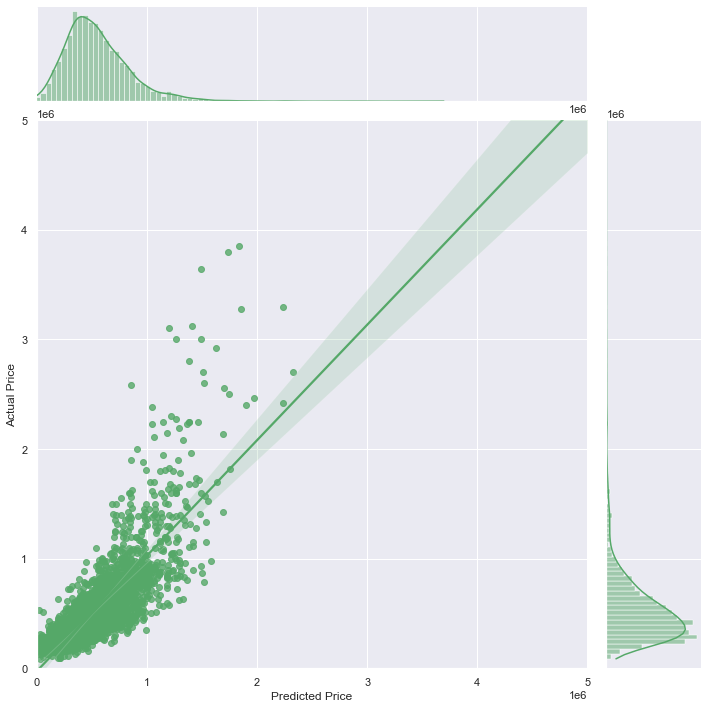

In [6]:
sns.set_palette("pastel", color_codes = False) 
sns.set(style = "darkgrid") 
plt.figure(figsize = (20,20)) 
g = sns.jointplot(x=y_pred, y=y_test, kind="reg", truncate=False, xlim=(0, 5e6), ylim=(0, 5e6), color="g",height=10, palette = 'pastel')
plt.xlabel("Predicted Price")
plt.ylabel("Actual Price")

In [7]:
weights = model_base.params
weights

const           -1.402823e+07
id              -4.058381e-07
bedrooms        -5.941889e+04
bathrooms        6.011210e+04
sqft_living      2.294344e+02
sqft_lot         1.641782e-01
floors           1.943930e+04
sqft_above       3.763981e+01
yr_built        -2.476528e+03
yr_renovated     3.298353e+01
zipcode         -5.539654e+02
lat              6.251217e+05
long            -3.550383e+05
sqft_living15    8.125947e+01
sqft_lot15      -3.657505e-01
dtype: float64

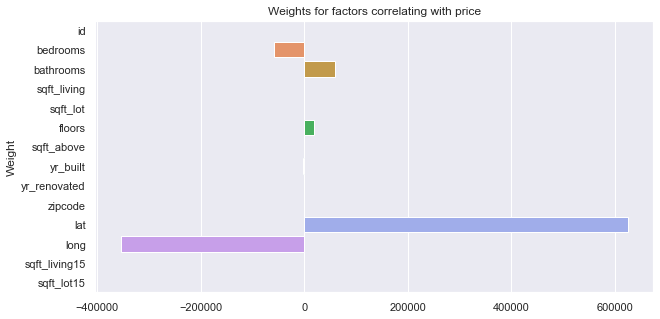

In [8]:
plt.figure(figsize=(10,5))
sns.barplot(y = weights[1::].index, x = weights[1::].values)
plt.title("Weights for factors correlating with price")
plt.ylabel('Weight')
plt.show()

Text(0.5, 1.0, 'Distribution of Residuals')

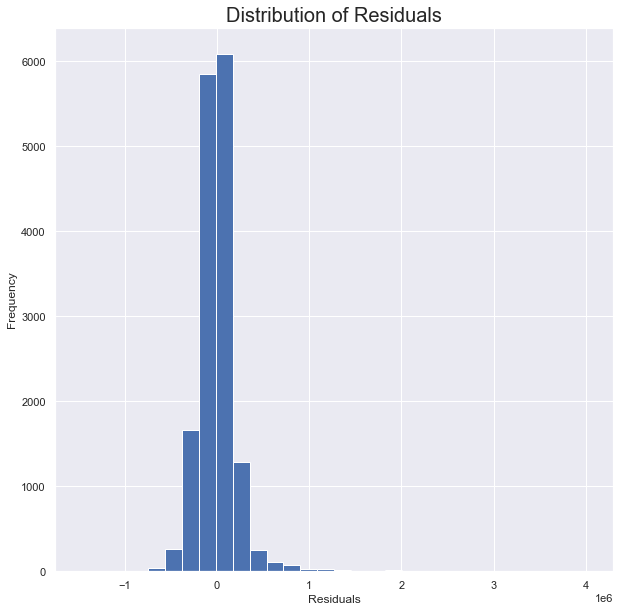

In [9]:
plt.figure(figsize = (10,10))
plt.hist(model_base.resid, bins = 30, )
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Distribution of Residuals', fontsize = 20)

In [10]:
X = df.drop(columns=['price','waterfront', 'City', 'renovate_bool'])
y = df['price']
#our first model on all cleaned and added data
model_1 = sm.OLS(endog = y, exog=sm.add_constant(X)).fit()
model_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.609
Model:                            OLS   Adj. R-squared:                  0.608
Method:                 Least Squares   F-statistic:                     1127.
Date:                Fri, 16 Sep 2022   Prob (F-statistic):               0.00
Time:                        11:21:58   Log-Likelihood:            -2.0610e+05
No. Observations:               15245   AIC:                         4.122e+05
Df Residuals:                   15223   BIC:                         4.124e+05
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          1.601e+08   5.71e+06     28.059      0.000    1.49e+08    1.71e+08
Unnamed: 0        0.6485      0.342      1.896      0.058      -0.022       1.319
bedrooms      -5.805e+04   3636.796    -15.963      0.000   -6.52e+04   -5.09e+04
bathrooms      8.852e+04   6376.360     13.882      0.000     7.6e+04    1.01e+05
sqft_living      92.7596      3.267     28.397      0.000      86.357      99.162
sqft_lot          0.1489      0.050      2.986      0.003       0.051       0.247
floors         6.332e+04   6927.597      9.141      0.000    4.97e+04    7.69e+04
sqft_above       59.8657      4.097     14.611      0.000      51.835      67.897
sqft_basement    32.8623      4.533      7.250      0.000      23.978      41.747
yr_built      -1996.1295     82.693    -24.139      0.000   -2158.218   -1834.041
yr_renovated     20.4283      3.928      5.200      0.000      12.728      28.128
zipcode       -1595.8494     58.484    -27.287      0.000   -1710.486   -1481.213
sqft_living15   132.3204      3.573     37.031      0.000     125.316     139.324
sqft_lot15       -0.3548      0.076     -4.654      0.000      -0.504      -0.205
cond_num       -530.4227   2288.036     -0.232      0.817   -5015.247    3954.402
grade_num      1144.2852   1319.340      0.867      0.386   -1441.780    3730.350
view_num        -65.9502   1967.874     -0.034      0.973   -3923.219    3791.318
bed/bath       5.129e+04   5761.234      8.903      0.000       4e+04    6.26e+04
avg_fl_space     53.4828      8.384      6.379      0.000      37.049      69.916
water_bool     4.107e+05   2.04e+04     20.141      0.000    3.71e+05    4.51e+05
base_bool      3.285e+04   5712.491      5.750      0.000    2.17e+04     4.4e+04
Population_x     -2.1721      0.137    -15.850      0.000      -2.441      -1.904
city_pop          0.3332      0.010     34.844      0.000       0.314       0.352
==============================================================================
Omnibus:                     3192.516   Durbin-Watson:                   1.983
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            11617.612
Skew:                           1.023   Prob(JB):                         0.00
Kurtosis:                       6.755   Cond. No.                     1.15e+18
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 3.44e-21. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [11]:
lr = LinearRegression()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2) 
lr.fit(X_train, y_train) #print(lr.coef_) #print(X.columns)

print("intercept = ", lr.intercept_) 
print('R2 for training = ', lr.score(X_train, y_train)) 
print('R2 for test = ', lr.score(X_test,y_test)) 
y_pred = lr.predict(X_test) 
MAE = mean_absolute_error(y_pred, y_test) 
print("MAE = ", MAE) 
RMSE = np.sqrt(mean_squared_error(y_pred, y_test)) 
print("RMSE = ",RMSE)

intercept =  161254124.4887198
R2 for training =  0.6098143185872886
R2 for test =  0.6016360099272117
MAE =  131333.1753865532
RMSE =  180433.5308014605


Text(70.375, 0.5, 'Actual Price')

<Figure size 1440x1440 with 0 Axes>

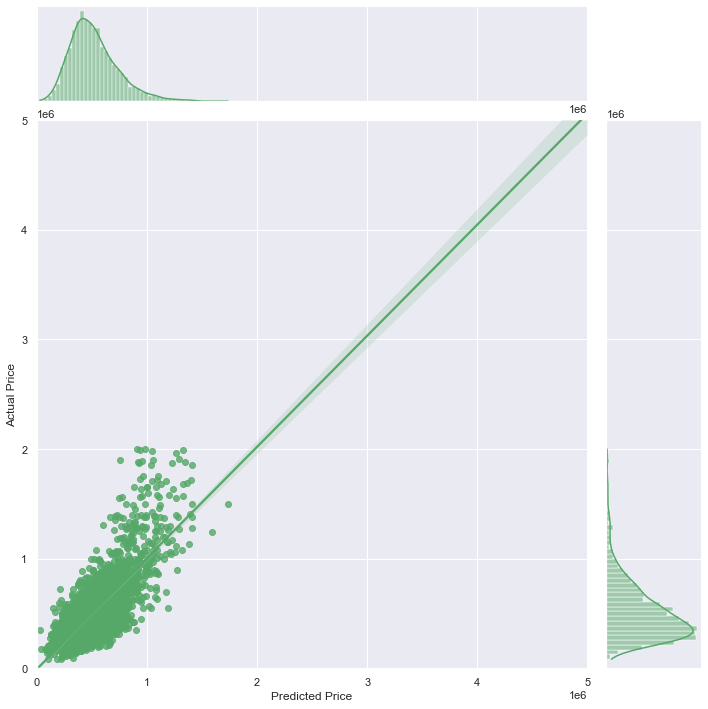

In [12]:
sns.set_palette("pastel", color_codes = False) 
sns.set(style = "darkgrid") 
plt.figure(figsize = (20,20)) 
g = sns.jointplot(x=y_pred, y=y_test, kind="reg", truncate=False, xlim=(0, 5e6), ylim=(0, 5e6), color="g",height=10, palette = 'pastel')
plt.xlabel("Predicted Price")
plt.ylabel("Actual Price")

In [13]:
weights = model_1.params
weights.sort_values(ascending = False)

const            1.600782e+08
water_bool       4.106521e+05
bathrooms        8.851587e+04
floors           6.332226e+04
bed/bath         5.128942e+04
base_bool        3.284850e+04
grade_num        1.144285e+03
sqft_living15    1.323204e+02
sqft_living      9.275962e+01
sqft_above       5.986572e+01
avg_fl_space     5.348282e+01
sqft_basement    3.286229e+01
yr_renovated     2.042834e+01
Unnamed: 0       6.484750e-01
city_pop         3.332033e-01
sqft_lot         1.488794e-01
sqft_lot15      -3.547644e-01
Population_x    -2.172133e+00
view_num        -6.595019e+01
cond_num        -5.304227e+02
zipcode         -1.595849e+03
yr_built        -1.996129e+03
bedrooms        -5.805453e+04
dtype: float64

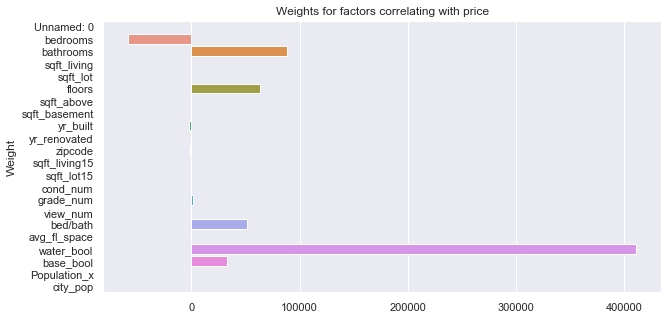

In [14]:
plt.figure(figsize=(10,5))
sns.barplot(y = weights[1::].index, x = weights[1::].values)
plt.title("Weights for factors correlating with price")
plt.ylabel('Weight')
plt.show()

Text(0.5, 1.0, 'Distribution of Residuals')

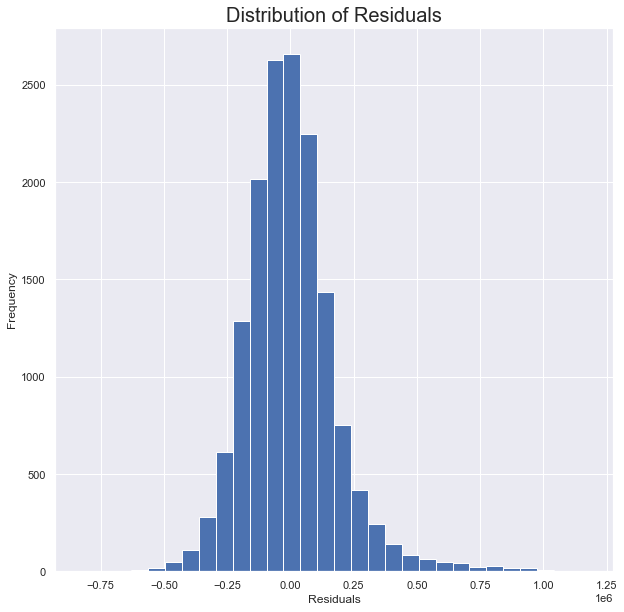

In [15]:
plt.figure(figsize = (10,10))
plt.hist(model_1.resid, bins = 30, )
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Distribution of Residuals', fontsize = 20)

In [16]:
X = df_zip.drop(columns=['price','waterfront', 'City', 'renovate_bool', 'bedrooms', 'bathrooms', 'Unnamed: 0', 'sqft_lot15',
                        'sqft_lot', 'zipcode', 'sqft_above', 'sqft_living15', 'city_pop'])
y = df_zip['price']
#our final model on all variables including zipcodes, and with variables containing high pvalues removed
model_2 = sm.OLS(endog = y, exog=sm.add_constant(X)).fit()
model_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.802
Model:                            OLS   Adj. R-squared:                  0.801
Method:                 Least Squares   F-statistic:                     742.3
Date:                Fri, 16 Sep 2022   Prob (F-statistic):               0.00
Time:                        11:21:59   Log-Likelihood:            -1.9623e+05
No. Observations:               14897   AIC:                         3.926e+05
Df Residuals:                   14815   BIC:                         3.932e+05
Df Model:                          81                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          5.905e+05   1.08e+05      5.446      0.000    3.78e+05    8.03e+05
sqft_living     239.4627      3.682     65.033      0.000     232.245     246.680
floors        -4.338e+04   5143.247     -8.434      0.000   -5.35e+04   -3.33e+04
sqft_basement   -93.1527      5.836    -15.962      0.000    -104.592     -81.714
yr_built       -192.4153     61.693     -3.119      0.002    -313.341     -71.489
yr_renovated     17.0134      2.856      5.958      0.000      11.416      22.611
cond_num       2131.9152   1639.641      1.300      0.194   -1081.984    5345.814
grade_num       715.7671    945.867      0.757      0.449   -1138.250    2569.785
view_num       -564.3056   1415.574     -0.399      0.690   -3339.007    2210.396
bed/bath      -2.144e+04   2037.202    -10.523      0.000   -2.54e+04   -1.74e+04
avg_fl_space    -21.2446      6.168     -3.444      0.001     -33.336      -9.154
water_bool      5.22e+05   1.54e+04     33.897      0.000    4.92e+05    5.52e+05
base_bool       486.1056   4177.536      0.116      0.907   -7702.384    8674.595
Population_x     -7.8960      0.448    -17.633      0.000      -8.774      -7.018
98002          1.491e+04   1.35e+04      1.106      0.269   -1.15e+04    4.13e+04
98003          1.101e+05    1.5e+04      7.338      0.000    8.07e+04    1.39e+05
98004          7.051e+05   1.16e+04     61.016      0.000    6.82e+05    7.28e+05
98005          2.681e+05   1.29e+04     20.829      0.000    2.43e+05    2.93e+05
98006          3.813e+05   1.19e+04     32.079      0.000    3.58e+05    4.05e+05
98007          2.297e+05   1.47e+04     15.645      0.000    2.01e+05    2.58e+05
98008          2.241e+05   1.11e+04     20.212      0.000    2.02e+05    2.46e+05
98010         -1.332e+05   1.75e+04     -7.605      0.000   -1.67e+05   -9.88e+04
98011           1.15e+05   1.33e+04      8.654      0.000     8.9e+04    1.41e+05
98014         -7.758e+04   1.58e+04     -4.913      0.000   -1.09e+05   -4.66e+04
98019         -9.656e+04   1.39e+04     -6.937      0.000   -1.24e+05   -6.93e+04
98022          -4.73e+04   1.18e+04     -4.005      0.000   -7.04e+04   -2.41e+04
98023          1.169e+05    1.5e+04      7.769      0.000    8.74e+04    1.46e+05
98024         -2.016e+04   1.82e+04     -1.106      0.269   -5.59e+04    1.56e+04
98027          1.615e+05   1.03e+04     15.718      0.000    1.41e+05    1.82e+05
98028          5.105e+04    1.1e+04      4.660      0.000    2.96e+04    7.25e+04
98029          1.867e+05   1.07e+04     17.484      0.000    1.66e+05    2.08e+05
98030          1.749e+04   1.29e+04      1.356      0.175   -7793.429    4.28e+04
98031           5.98e+04   1.32e+04      4.534      0.000    3.39e+04    8.57e+04
98032          3.425e+04   1.56e+04      2.191      0.028    3612.997    6.49e+04
98033          4.092e+05   1.15e+04     35.510   

In [17]:
lr = LinearRegression()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2) 
lr.fit(X_train, y_train) #print(lr.coef_) #print(X.columns)

print("intercept = ", lr.intercept_) 
print('R2 for training = ', lr.score(X_train, y_train)) 
print('R2 for test = ', lr.score(X_test,y_test)) 
y_pred = lr.predict(X_test) 
MAE = mean_absolute_error(y_pred, y_test) 
print("MAE = ", MAE) 
RMSE = np.sqrt(mean_squared_error(y_pred, y_test)) 
print("RMSE = ",RMSE)

intercept =  -4695920182792.129
R2 for training =  0.8021768608072625
R2 for test =  0.8015319736175489
MAE =  84225.76495287595
RMSE =  126252.49184592473


Text(61.125, 0.5, 'Actual Price')

<Figure size 1440x1440 with 0 Axes>

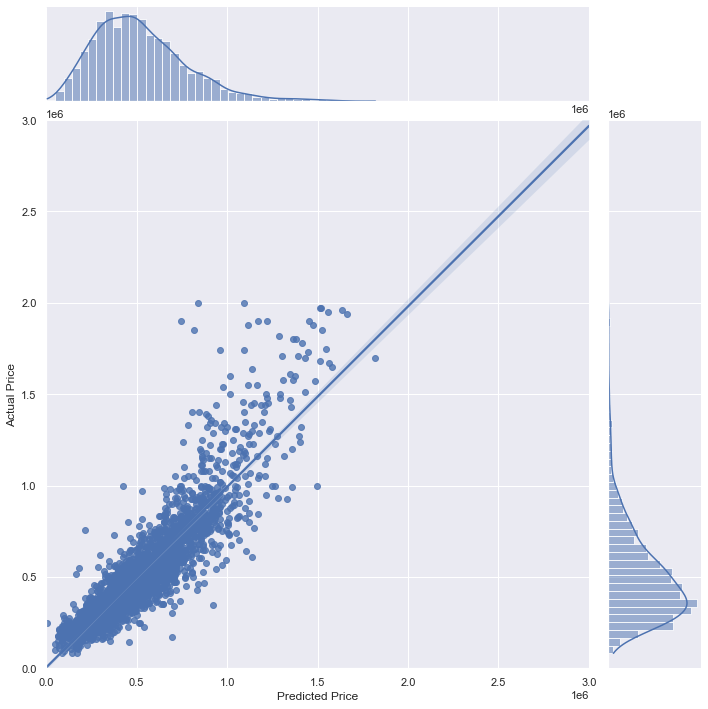

In [18]:
sns.set_palette("pastel", color_codes = False) 
sns.set(style = "darkgrid") 
plt.figure(figsize = (20,20)) 
sns.jointplot(x=y_pred, y=y_test, kind="reg", truncate=False, xlim=(0, 3e6), ylim=(0, 3e6), color="b",height=10, palette = 'pastel')
plt.xlabel("Predicted Price")
plt.ylabel("Actual Price")

In [19]:
weights = model_2.params
print(weights.sort_values().head(10))
print(weights.sort_values().tail(10))

98010    -133161.112073
98148    -120289.927318
98019     -96564.410445
98014     -77577.537171
98070     -55923.209446
98065     -50801.664464
98022     -47297.241855
floors    -43376.804953
98188     -33075.429835
98055     -27649.147727
dtype: float64
98103         474783.762096
98115         479763.447863
98052         482429.250007
98040         509358.781742
water_bool    521979.372618
98112         527860.720337
const         590517.459949
98105         595607.449013
98004         705131.935112
98039         762819.015456
dtype: float64


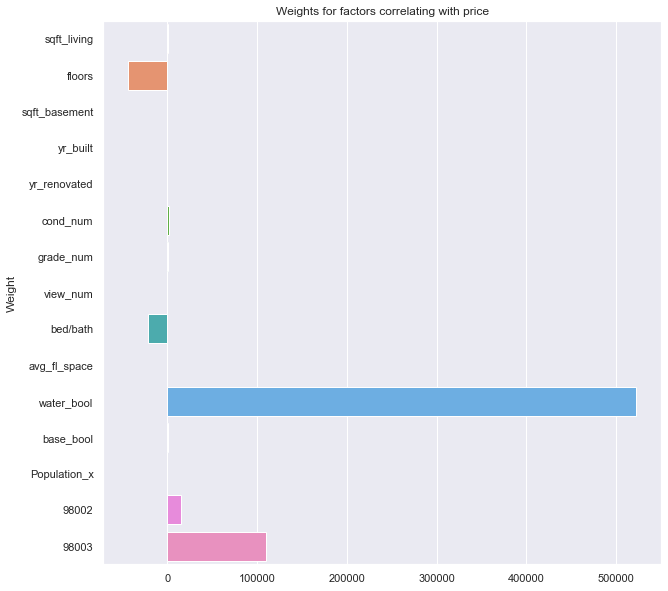

In [20]:
plt.figure(figsize=(10,10))
sns.barplot(y = weights[1:16].index, x = weights[1:16].values)
plt.title("Weights for factors correlating with price")
plt.ylabel("Weight")
plt.show()

Text(0.5, 1.0, 'Distribution of Residuals')

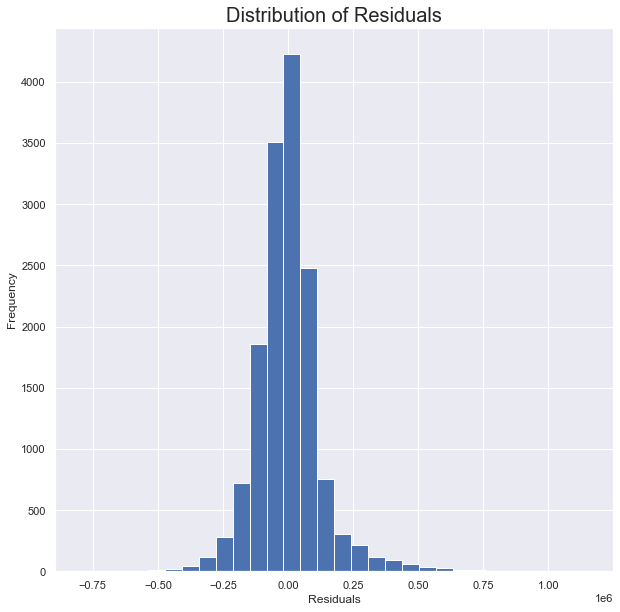

In [21]:
plt.figure(figsize = (10,10))
plt.hist(model_2.resid, bins = 30, )
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Distribution of Residuals', fontsize = 20)

In [31]:
#standardizing the variables so we can see on level field how much importance each variable carries
X_standard = X.apply(lambda x: (x-x.mean())/ x.std())
X_standard_aug = sm.add_constant(X_standard)

results_standardized = sm.OLS(y, X_standard_aug).fit()

In [23]:
weights = results_standardized.params
weights

const            518851.975431
sqft_living      202206.363569
floors           -23867.296167
sqft_basement    -39527.761255
yr_built          -5588.203471
                     ...      
98177             28715.184014
98178              5816.833803
98188              1539.225806
98198              5758.355905
98199             49844.605871
Length: 83, dtype: float64

Text(0.5, 1.0, 'Weights for factors correlating with price')

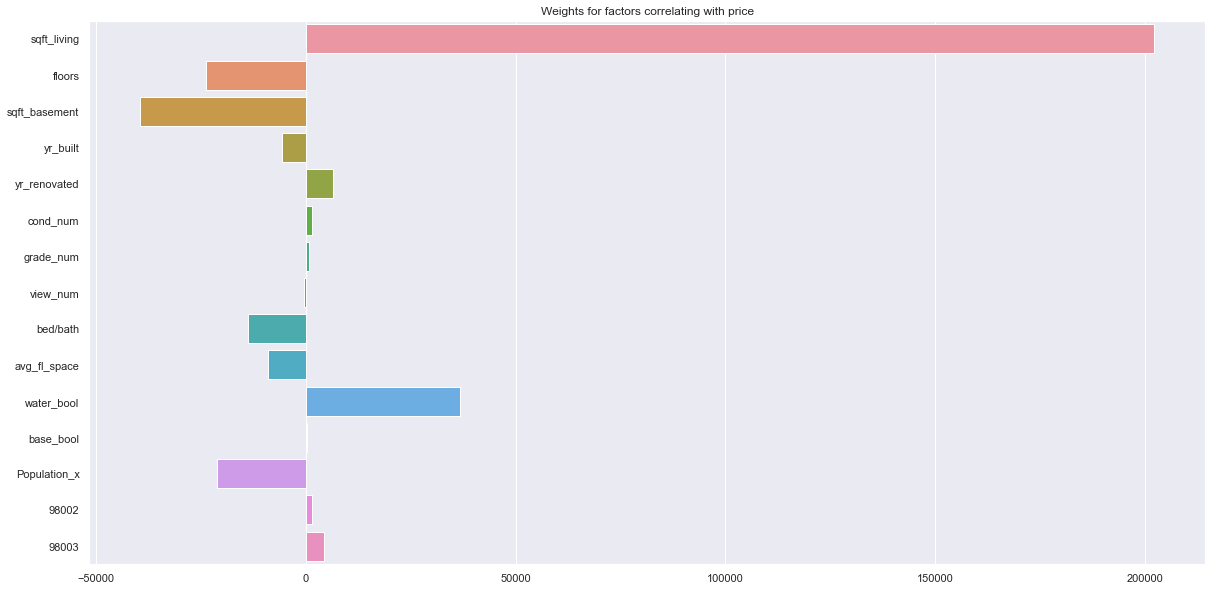

In [24]:
plt.figure(figsize=(20,10))
sns.barplot(y = weights[1:16].index, x = weights[1:16].values)
plt.title("Weights for factors correlating with price")

In [25]:
print(results_standardized.rsquared)

0.8023025242634585


In [26]:
results_standardized.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.802
Model:                            OLS   Adj. R-squared:                  0.801
Method:                 Least Squares   F-statistic:                     742.3
Date:                Fri, 16 Sep 2022   Prob (F-statistic):               0.00
Time:                        11:22:01   Log-Likelihood:            -1.9623e+05
No. Observations:               14897   AIC:                         3.926e+05
Df Residuals:                   14815   BIC:                         3.932e+05
Df Model:                          81                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          5.189e+05   1044.791    496.608      0.000    5.17e+05    5.21e+05
sqft_living    2.022e+05   3109.295     65.033      0.000    1.96e+05    2.08e+05
floors        -2.387e+04   2829.978     -8.434      0.000   -2.94e+04   -1.83e+04
sqft_basement -3.953e+04   2476.325    -15.962      0.000   -4.44e+04   -3.47e+04
yr_built      -5588.2035   1791.711     -3.119      0.002   -9100.180   -2076.227
yr_renovated   6581.1670   1104.673      5.958      0.000    4415.871    8746.463
cond_num       1383.6863   1064.183      1.300      0.194    -702.245    3469.617
grade_num       835.1820   1103.671      0.757      0.449   -1328.150    2998.514
view_num       -434.7810   1090.659     -0.399      0.690   -2572.607    1703.045
bed/bath      -1.367e+04   1298.755    -10.523      0.000   -1.62e+04   -1.11e+04
avg_fl_space  -9086.5313   2638.331     -3.444      0.001   -1.43e+04   -3915.075
water_bool      3.67e+04   1082.653     33.897      0.000    3.46e+04    3.88e+04
base_bool       236.8768   2035.692      0.116      0.907   -3753.333    4227.086
Population_x  -2.107e+04    690.883    -30.502      0.000   -2.24e+04   -1.97e+04
98002          1591.3783   1304.377      1.220      0.222    -965.363    4148.120
98003          4335.7842   1453.638      2.983      0.003    1486.473    7185.096
98004           8.41e+04   1399.613     60.089      0.000    8.14e+04    8.68e+04
98005          3.236e+04   1257.235     25.736      0.000    2.99e+04    3.48e+04
98006           5.25e+04   1621.863     32.369      0.000    4.93e+04    5.57e+04
98007          2.153e+04   1214.213     17.730      0.000    1.91e+04    2.39e+04
98008           3.12e+04   1383.929     22.542      0.000    2.85e+04    3.39e+04
98010          1889.9273   1136.803      1.662      0.096    -338.348    4118.202
98011          1.244e+04   1290.827      9.636      0.000    9907.695     1.5e+04
98014          5623.4991   1167.215      4.818      0.000    3335.613    7911.385
98019          2737.3281   1220.652      2.243      0.025     344.698    5129.958
98022          1907.7738   1312.448      1.454      0.146    -664.787    4480.334
98023          3554.1797   1683.907      2.111      0.035     253.513    6854.846
98024          8562.4392   1126.113      7.604      0.000    6355.117    1.08e+04
98027          2.678e+04   1501.547     17.836      0.000    2.38e+04    2.97e+04
98028          1.395e+04   1366.010     10.213      0.000    1.13e+04    1.66e+04
98029          2.916e+04   1436.579     20.302      0.000    2.63e+04     3.2e+04
98030           688.8091   1370.482      0.503      0.615   -1997.507    3375.125
98031          3610.5040   1405.096      2.570      0.010     856.342    6364.666
98032          1816.9284   1235.640      1.470      0.141    -605.079    4238.936
98033          5.562e+04   1558.822     35.679   